In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from gensim.models import CoherenceModel
import re

In [18]:
data = pd.read_csv(r"C:\Users\befekadum\Documents\10x acadamy\Week 1\project\week1\raw_analyst_ratings.csv")

# Create a new column for the length of each headline
data['headline_length'] = data['headline'].apply(len)

# Get descriptive statistics for headline lengths
headline_stats = data['headline_length'].describe()
print(headline_stats)

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [9]:
# Count the number of articles per publisher
publisher_counts = data['publisher'].value_counts()
print(publisher_counts)

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


In [10]:
time_data = data['date'].apply(lambda x: len(x.split()) > 1)
print(time_data.sum())

1407328


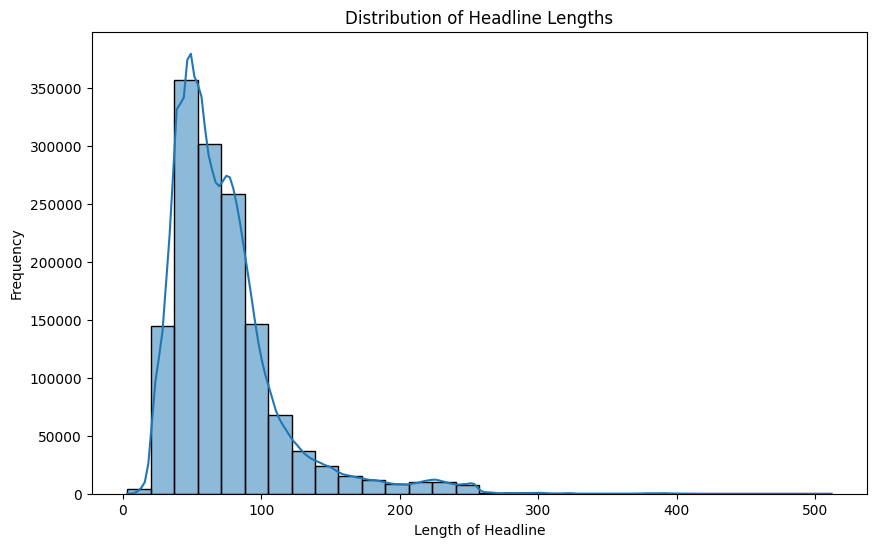

In [11]:


# Plot the distribution of headline lengths
plt.figure(figsize=(10, 6))
sns.histplot(data['headline_length'], bins=30, kde=True)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Length of Headline')
plt.ylabel('Frequency')
plt.show()

In [12]:
data.shape

(1407328, 7)

In [13]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\befekadum\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [14]:
# Function to get the sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [35]:
data.head()

,Unnamed: 0,headline,url,publisher,date,stock,headline_length,sentiment
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39,Neutral
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42,Neutral
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29,Neutral
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44,Neutral
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87,Neutral


In [15]:
data['sentiment'] = data['headline'].apply(get_sentiment)


In [16]:
sentiment_counts = data['sentiment'].value_counts()
print(sentiment_counts)

sentiment
Neutral     934914
Positive    341178
Negative    131236
Name: count, dtype: int64


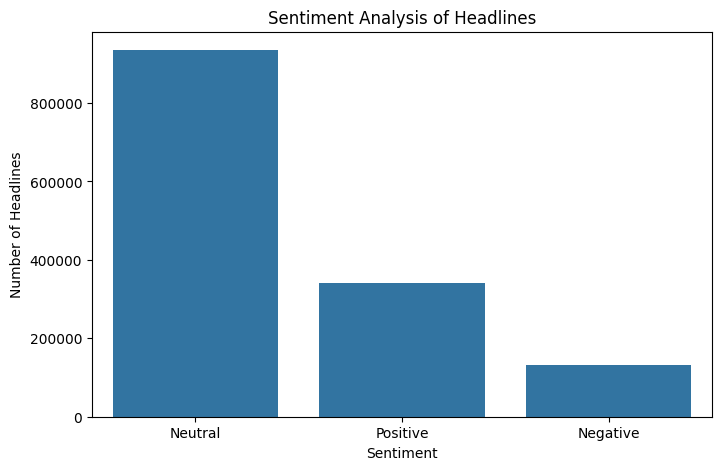

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='sentiment', order=sentiment_counts.index)
plt.title('Sentiment Analysis of Headlines')
plt.xlabel('Sentiment')
plt.ylabel('Number of Headlines')
plt.show()

In [39]:
apple_data = sentiment_data[sentiment_data['stock'] == 'AAPL']
apple_data

,Unnamed: 0,headline,url,publisher,date,stock,headline_length,sentiment
6680,7120,Tech Stocks And FAANGS Strong Again To Start D...,https://www.benzinga.com/government/20/06/1622...,JJ Kinahan,2020-06-10 11:33:26-04:00,AAPL,69,Positive
6681,7121,10 Biggest Price Target Changes For Wednesday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-06-10 08:14:08-04:00,AAPL,45,Neutral
6682,7122,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",https://www.benzinga.com/short-sellers/20/06/1...,Benzinga Newsdesk,2020-06-10 07:53:47-04:00,AAPL,87,Positive
6683,7123,"Deutsche Bank Maintains Buy on Apple, Raises P...",https://www.benzinga.com/news/20/06/16219873/d...,Benzinga Newsdesk,2020-06-10 07:19:25-04:00,AAPL,65,Neutral
6684,7124,Apple To Let Users Trade In Their Mac Computer...,https://www.benzinga.com/news/20/06/16218697/a...,Neer Varshney,2020-06-10 06:27:11-04:00,AAPL,87,Neutral
...,...,...,...,...,...,...,...,...
7116,7585,"UBS Maintains Buy on Apple, Lowers Price Targe...",https://www.benzinga.com/news/20/03/15514989/u...,Vick Meyer,2020-03-10 00:00:00,AAPL,55,Neutral
7117,7586,123 Biggest Movers From Yesterday,https://www.benzinga.com/news/20/03/15514298/1...,Lisa Levin,2020-03-10 00:00:00,AAPL,33,Neutral
7118,7587,Crude Awakening: Energy Sector Takes A 20% Spi...,https://www.benzinga.com/news/earnings/20/03/1...,JJ Kinahan,2020-03-09 00:00:00,AAPL,91,Negative
7119,7588,Investor Movement Index Summary: February 2020,https://www.benzinga.com/news/earnings/20/03/1...,TD Ameritrade,2020-03-09 00:00:00,AAPL,46,Neutral


In [40]:
print(sentiment_data['date'].min(), sentiment_data['date'].max())

2009-02-14 00:00:00 2020-06-11 17:12:35-04:00


In [2]:
#Topic Modeling

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\befekadum\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\befekadum\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\befekadum\AppData\Roaming\nltk_data...


True

In [3]:
# Define stop words
stop = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

In [21]:
# Preprocess the text
def preprocess_text(text):
    text = re.sub('[^A-Za-z]', ' ', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    text = text.split()  # Split into words
    text = [word for word in text if word not in stop]  # Remove stop words
    text = [lemma.lemmatize(word) for word in text]  # Lemmatize
    return text



In [20]:
data['cleaned_text'] = data['headline'].apply(preprocess_text)

In [8]:
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(data['cleaned_text'])

# Filter out extremes to limit the number of features
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Convert the document into the bag-of-words format (list of (token_id, token_count))
corpus = [dictionary.doc2bow(text) for text in data['cleaned_text']]


In [9]:
# Set parameters
num_topics = 25  

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)


In [10]:
# Display the topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx}\nWords: {topic}\n")


Topic: 0
Words: 0.086*"group" + 0.075*"b" + 0.070*"guidance" + 0.061*"outlook" + 0.055*"share" + 0.049*"plan" + 0.047*"fy" + 0.042*"last" + 0.038*"raise" + 0.027*"qtr"

Topic: 1
Words: 0.078*"year" + 0.065*"yum" + 0.063*"u" + 0.055*"deal" + 0.050*"well" + 0.049*"report" + 0.043*"fargo" + 0.038*"volume" + 0.026*"agreement" + 0.022*"management"

Topic: 2
Words: 0.077*"pt" + 0.066*"maintains" + 0.063*"buy" + 0.060*"raise" + 0.050*"target" + 0.049*"lower" + 0.048*"bank" + 0.042*"downgrade" + 0.042*"price" + 0.039*"upgrade"

Topic: 3
Words: 0.174*"v" + 0.159*"est" + 0.120*"q" + 0.109*"report" + 0.106*"eps" + 0.056*"sale" + 0.047*"see" + 0.046*"b" + 0.042*"revenue" + 0.021*"adj"

Topic: 4
Words: 0.114*"sector" + 0.080*"company" + 0.067*"trading" + 0.063*"share" + 0.042*"higher" + 0.034*"price" + 0.029*"several" + 0.029*"lower" + 0.028*"china" + 0.023*"u"

Topic: 5
Words: 0.110*"analyst" + 0.095*"yoy" + 0.095*"sell" + 0.051*"digital" + 0.050*"ipo" + 0.050*"corp" + 0.048*"blog" + 0.034*"medium

In [11]:
def assign_topic(text):
    bow = dictionary.doc2bow(text)
    topics = lda_model.get_document_topics(bow)
    return sorted(topics, key=lambda x: x[1], reverse=True)[0][0]

data['topic'] = data['cleaned_text'].apply(assign_topic)


In [22]:
# Prepare the visualization
lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)

# Display the visualization
pyLDAvis.display(lda_vis)